# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [2]:
import os
import pandas as pd

# Define paths to the training data and targets files


training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [3]:
# concatenate the training data and training target data
train = pd.read_csv(training_data_path)
train_target = pd.read_csv(training_targets_path)


df = pd.concat([train, train_target], axis=1, join="inner")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A356BF850>,
      dtype=object)

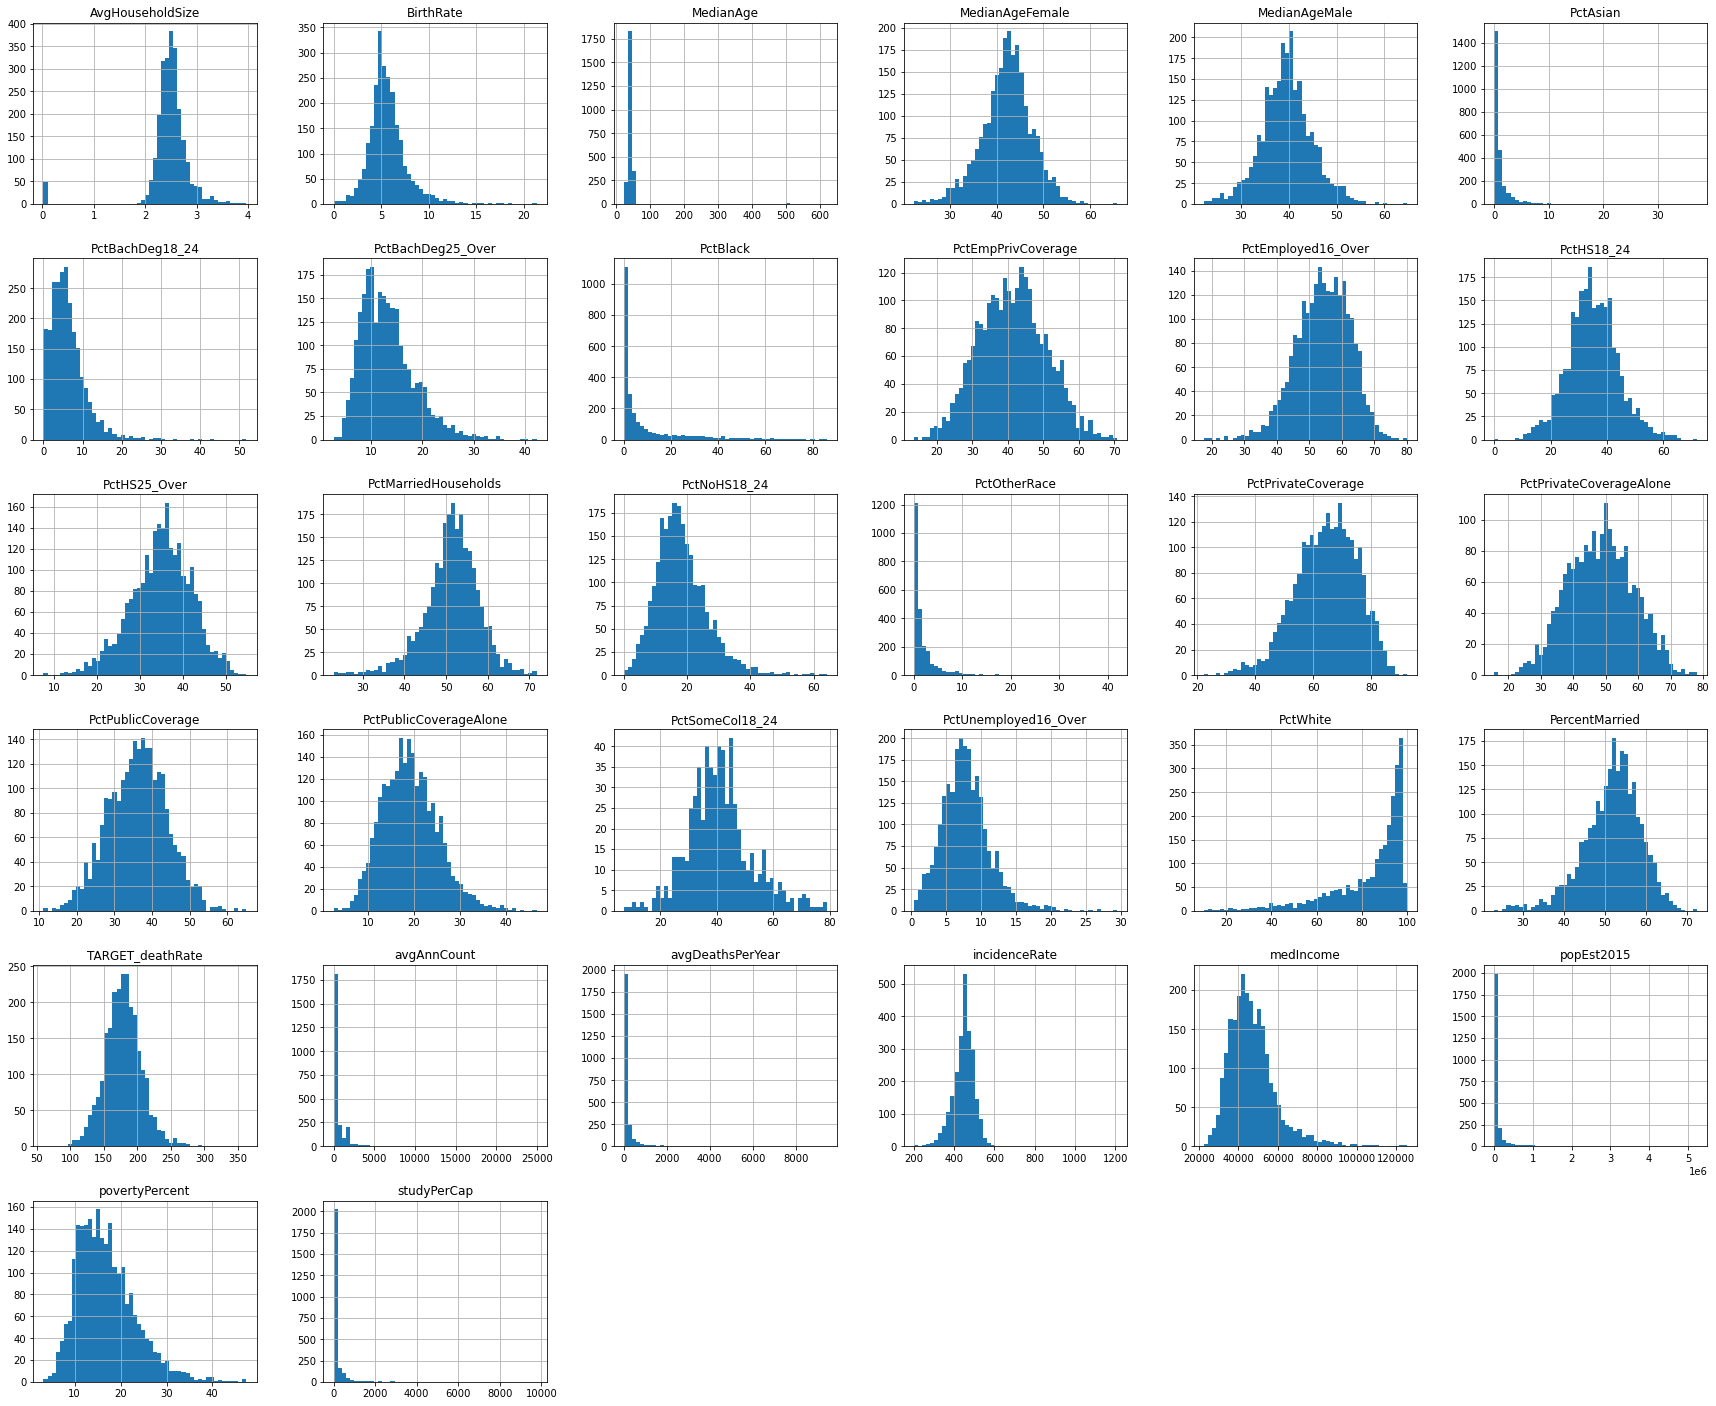

In [4]:
# Plot histograms of all features to visualise their distributions
# From the histogram, we can easily spot outlier in the AvgHouseholdSize histogram on the far left of the figure. 
# Additionally, Median Income with values exceeding 100,000 is also treated as outliers 
#It is crucial to identify outliers and see how it might affect the data.

%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(30,25))

In [5]:
# Here, we try to identify unusual values for any of the features. Some column (PctSomeCol18_24,PctPrivateCoverageAlone,PctEmployed16_Over)
# has empty cells - need impute. The value for BirthRate is unusual and should be an integer because number of live births 
# relative to number of women in county should not be floating number

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0         59.0                30          404.3      33975        8251   
1        114.0                41          403.8      47363       22702   
2         33.0                11          352.0      77222        9899   
3        254.0               100          429.6      80650       48904   
4         75.0                32          407.5      42839       22255   

   povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            20.5          0.0       51.3           50.8             51.9   
1            13.8          0.0       40.8           39.8             42.7   
2             6.8          0.0       38.1           36.9             39.8   
3             7.5          0.0       43.5           42.7             44.1   
4            14.6          0.0       31.1           30.2             31.6   

   ...  PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
0  ...                26.0               49.7                    20.6   
1  ...                46.8               31.6                    13.0   
2  ...                54.3               18.2                     8.6   
3  ...                55.6               28.8                    13.5   
4  ...                46.5               26.8                    18.1   

    PctWhite  PctBlack  PctAsian  PctOtherRace  PctMarriedHouseholds  \
0  96.684036  0.438181  0.082899      0.272383             51.926207   
1  92.295459  2.102845  0.609648      0.879131             50.949545   
2  95.690422  0.000000  0.523871      0.118612             64.532156   
3  89.606996  7.407407  0.870370      0.450617             62.344481   
4  79.587990  2.948701  8.482564      5.637090             63.005948   

   BirthRate  TARGET_deathRate  
0   5.041436             199.5  
1   6.329661             137.1  
2   5.148130             126.9  
3   5.627462             173.8  
4  10.436469             179.8  

[5 rows x 32 columns]

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.3, random_state=40)
print(len(train_set))
print(len(test_set))

cancer_train = train_set.copy()      
cancer_test = test_set.copy()


1706
732


In [7]:
# Compute correlations of all features with the target variable (across the data set)
# Sort them according the strength of correlations

corr_matrix=train_set.corr()
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.449004
incidenceRate              0.426995
povertyPercent             0.418543
PctHS25_Over               0.417276
PctPublicCoverage          0.402907
PctUnemployed16_Over       0.354304
PctHS18_24                 0.257313
PctBlack                   0.231646
PctNoHS18_24               0.088952
MedianAgeFemale            0.030560
MedianAge                  0.009196
MedianAgeMale             -0.005632
studyPerCap               -0.037958
AvgHouseholdSize          -0.052632
avgDeathsPerYear          -0.089572
BirthRate                 -0.095581
popEst2015                -0.126813
avgAnnCount               -0.138749
PctWhite                  -0.177011
PctAsian                  -0.179884
PctOtherRace              -0.182497
PctSomeCol18_24           -0.203980
PercentMarried            -0.258743
PctBachDeg18_24           -0.276228
PctEmpPrivCoverage        -0.282080
PctMarriedHouseholds      -0.288121
PctPrivateCoverageAlone   -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A36FBD1F0>,
      dtype=object)

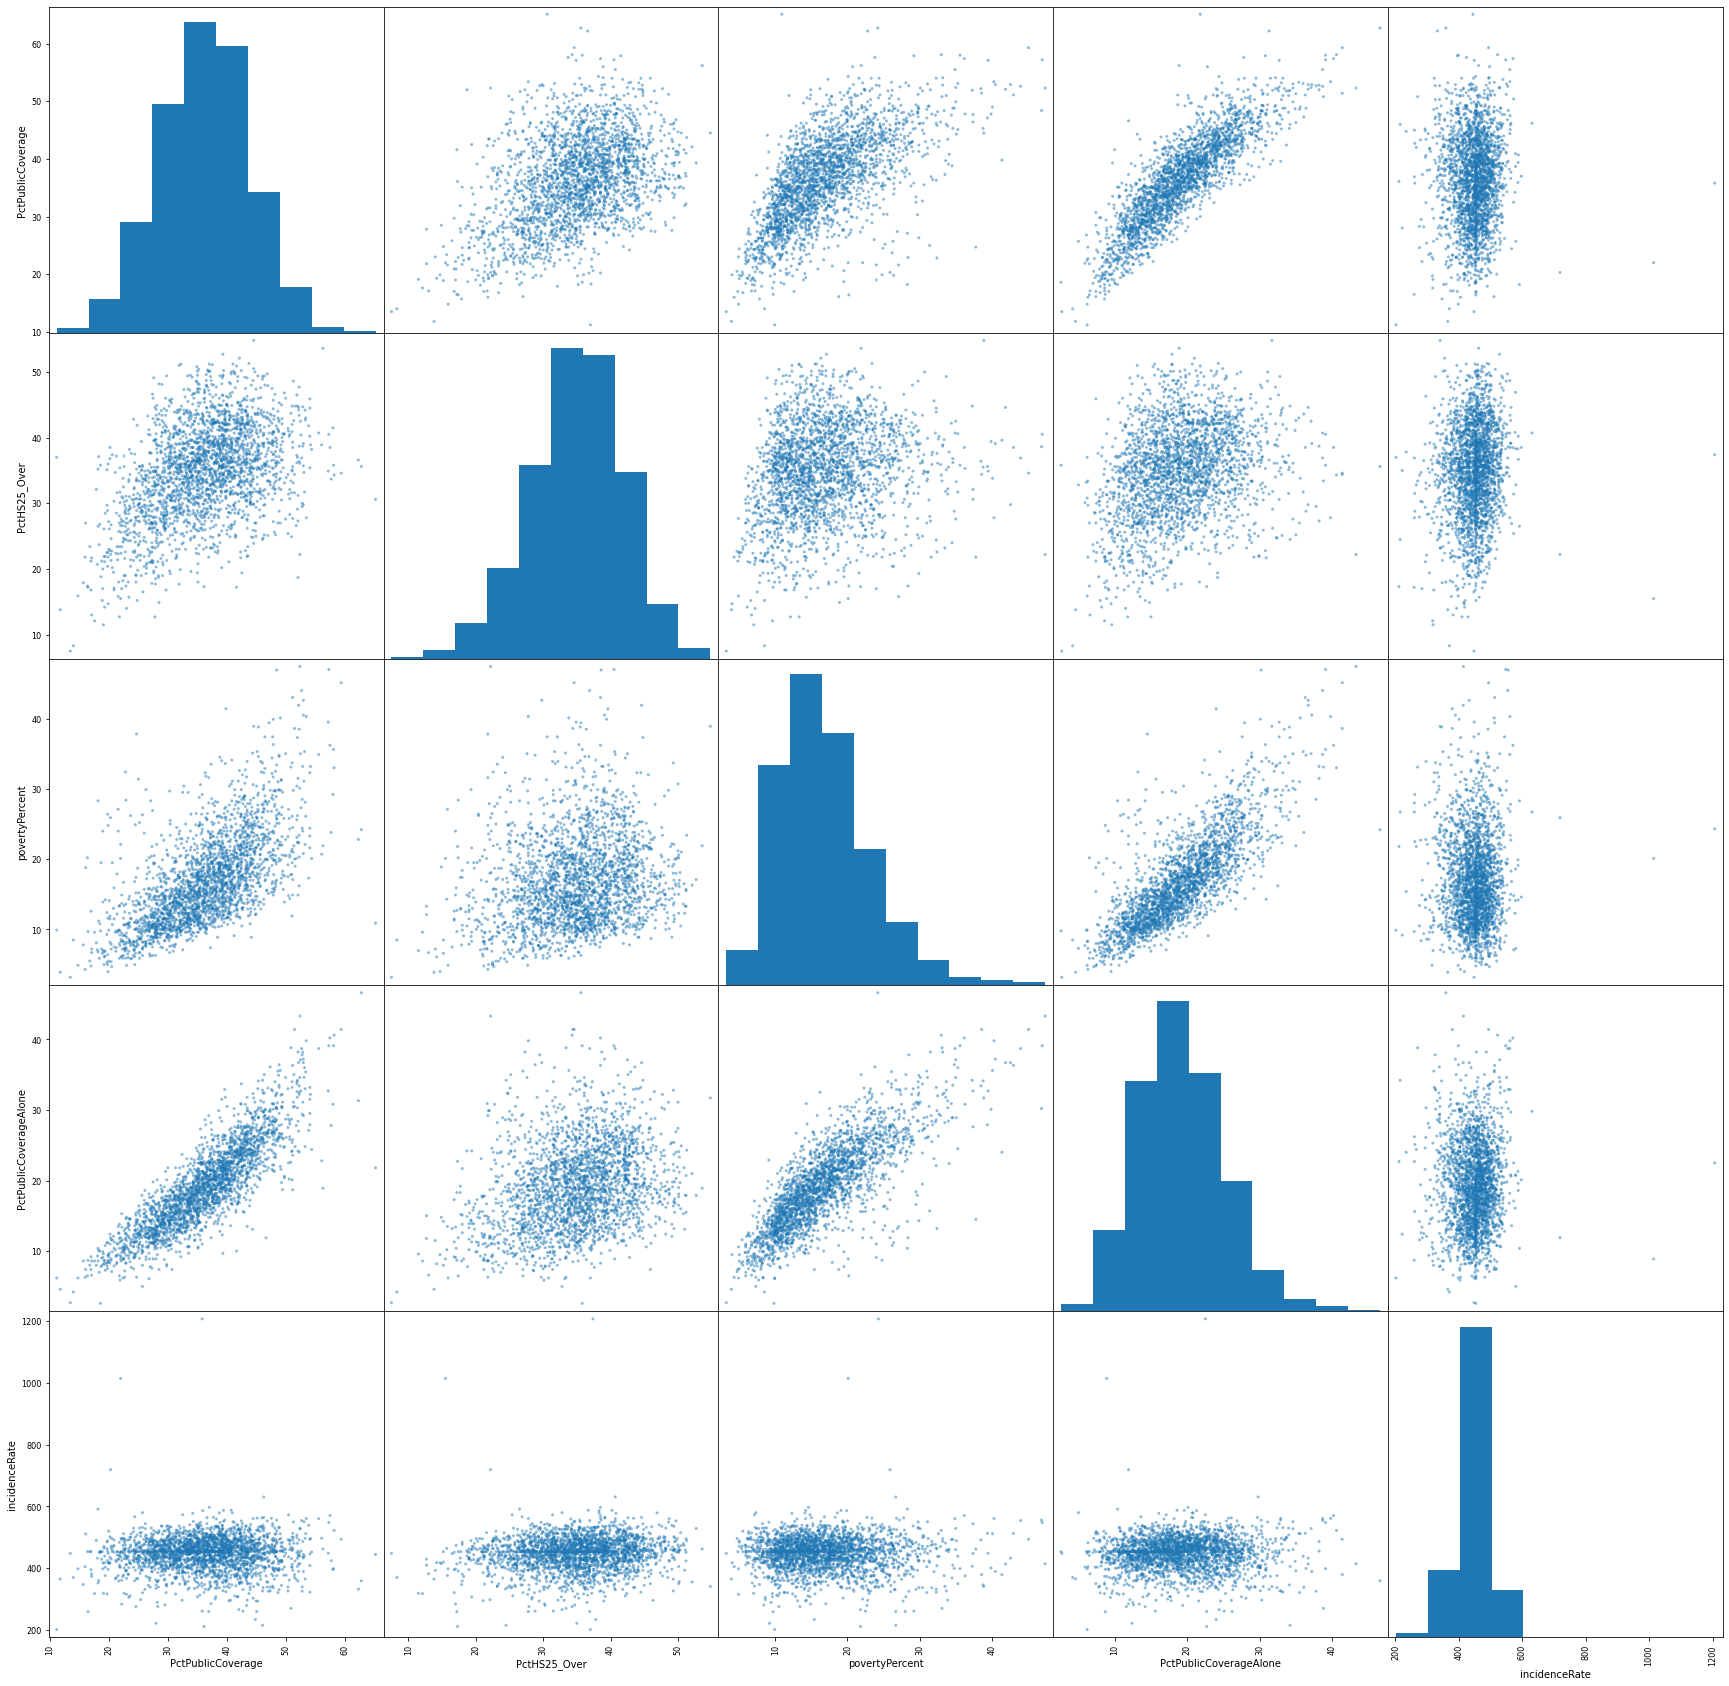

In [8]:
# Plot these correlations using the scatter matrix plotting function

from pandas.plotting import scatter_matrix

attributes=["PctPublicCoverage","PctHS25_Over","povertyPercent","PctPublicCoverageAlone","incidenceRate"]
scatter_matrix(df[attributes],figsize=(30,30))

# Explanation - Question 1

**Histogram Findings**

From the histogram, we can easily spot outlier in the AvgHouseholdSize histogram on the far left of the figure. 
Additionally, Median Income with values exceeding 100,000 is also treated as outliers. It is crucial to identify outliers and see how it might affect the data. Because AvgHouseholdSize is not among the Top 5 characteristics with the strongest correlations to the targets, we ignore the outliers because even if they have a large impact on the mean and standard deviation, the performance of the model is anticipated to be unaffected by that.

**Unusual values**

Here, we try to identify unusual values for any of the features.
PctSomeCol18_24,PctPrivateCoverageAlone,PctEmployed16_Over has empty cells which require imputation. 
Additionally, AvgHouseholdSize which shows the Mean household size of county contains numbers that are nearly zero.


**Train-Test Split**


A test should be created as early as possible before further data analysis and data cleaning.
To ensure enough data in the training dataset for the model to learn an effective mapping of inputs to outputs and enough data in the test set to effectively evaluate the model performance, we split the train set to 70% and test set to be 30%. To also ensure reproducibility, we assign a value to random state. We do not stratify as sub-categorize the data is not necessary for this case

**Top 5 characteristics with the strongest correlations to the target**


PctPublicCoverageAlone     0.449004

incidenceRate              0.426995

povertyPercent             0.418543

PctHS25_Over               0.417276

PctPublicCoverage          0.402907


In some cases, some regression models have a large number of features that increase the computational cost and slower down the performance of the model. By evaluating the relationship between each feature and target using a correlation and selecting those features that have the strongest relationship with the target variable, we can lower the cost and increase the performance. 

**Scatter Matrix Findings**

From the scatter matrix, we can see that PctPublicCoverage and PctPublicCoverageAlone shows visible correlations to each other. Aside from that, povertyPercent and PctPublicCoverageAlone also shows visible correlations to each other.




# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [9]:
#Verify that there is missing data that needs to be imputed

print(df['PctPrivateCoverageAlone'].isnull().any())
print(df['PctSomeCol18_24'].isnull().any())
print(df['PctEmployed16_Over'].isnull().any())

True
True
True


In [10]:
#Create a ML pipeline using scikit

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


x = cancer_train.drop("TARGET_deathRate",axis=1)
y = cancer_train["TARGET_deathRate"].copy()

x_test = cancer_test.drop("TARGET_deathRate",axis=1)
y_test = cancer_test["TARGET_deathRate"].copy()

num_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


train_tr = num_pipeline.fit_transform(x)
test_tr = num_pipeline.fit_transform(x_test)

print(train_tr.shape)
print(test_tr.shape)

(1706, 31)
(732, 31)


# Explanation - Question 2

**ML pipeline**


We have verified that the dataset contains missing data. Either removing data where NaN occurs or replacing them by a sensible default value - which is known as a process called imputation need to be carried out.

It was decided to replace the missing value by the median of the attribute as the data is skewed. Hence, it is good to consider using the median value for replacing the missing values. 

We also standardize features by removing the mean and scaling to unit variance in the pipeline as they might behave as expected if the individual features do not more or less look like standard normally distributed data


Pipelines group transformers sequentially and provide a single access point for running the entire preprocessing. As the dataset only contain numerical value, we do not need to combine seperate pipelines for numerical and categorical value.

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# Ordinary Least Squares

In [11]:
#Fit linear regression models to the pre-processed data using Ordinary least squares (OLS)

from sklearn.linear_model import LinearRegression
import os
import numpy as np
import pandas as pd

lin_reg=LinearRegression()
lin_reg.fit(train_tr,y)

some_data=x.iloc[:5]
some_labels=y.iloc[:5]
some_data_prepared=num_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [170.33920399 202.57907114 172.09307981 188.64405127 221.58492619]
Labels: [159.2, 227.4, 163.3, 183.2, 185.7]


In [12]:
#Evaluate model using mean squared error and RMSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
cancer_predictions = lin_reg.predict(train_tr)
lin_mse=mean_squared_error(y, cancer_predictions)
lin_rmse=np.sqrt(lin_mse)
print("TRAINED MSE SCORE:", lin_mse)
print("TRAINED RMSE SCORE:", lin_rmse)
print("R2 SCORE = ", r2_score(y, cancer_predictions))

cancer_test = lin_reg.predict(test_tr)
lin_test_mse=mean_squared_error(y_test, cancer_test)
lin_test_rmse=np.sqrt(lin_test_mse)
print("TEST MSE SCORE:", lin_test_mse)
print("TEST RMSE SCORE:", lin_test_rmse)
print("TEST R2 SCORE = ", r2_score(y_test, cancer_test))

TRAINED MSE SCORE: 364.5105326105021
TRAINED RMSE SCORE: 19.092158930055607
R2 SCORE =  0.5197854821978345
TEST MSE SCORE: 347.6225386694571
TEST RMSE SCORE: 18.64463833571081
TEST R2 SCORE =  0.5390293410963335


# Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
scores =cross_val_score(lin_reg, train_tr ,y ,scoring="neg_mean_squared_error",cv=5)

lin_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
cv_lin_score = display_scores(lin_scores)

Scores: [18.91420898 19.38507732 20.91083462 20.18661575 19.76178652]
Mean: 19.831704636680858
Standard deviation: 0.6836148330230454


# Rigde 

In [14]:
#Fit linear regression models to the pre-processed data using ridge
#Suitable regularisation weights has been choosen using GridSearchCV with cv=3

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param = [{'alpha':[.0001, 0.001,0.01, 0.01,1,10,100]}]

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param, cv=5)
result = ridge_grid.fit(train_tr,y)
ridge_predict = ridge_grid.predict(train_tr)
ridge_mse= mean_squared_error(y,ridge_predict)
ridge_rmse = np.sqrt(ridge_mse)
print("MSE SCORE = ", ridge_mse)
print("RMSE SCORE = ", ridge_rmse)
print("R2 SCORE = ", r2_score(y, ridge_predict))

cancer_r_test = ridge_grid.predict(test_tr)
lin_test_r_mse=mean_squared_error(y_test, cancer_r_test)
lin_test_r_rmse=np.sqrt(lin_test_r_mse)
print("TEST MSE SCORE:", lin_test_r_mse)
print("TEST RMSE SCORE:", lin_test_r_rmse)
print("TEST R2 SCORE = ", r2_score(y_test, cancer_r_test))
result.best_params_

MSE SCORE =  369.764778240623
RMSE SCORE =  19.229268791106513
R2 SCORE =  0.5128634187567246
TEST MSE SCORE: 352.76362907994394
TEST RMSE SCORE: 18.782002797357475
TEST R2 SCORE =  0.5322119125053212


{'alpha': 100}

# Lasso

In [15]:
#Fit linear regression models to the pre-processed data using lasso
#Suitable regularisation weights has been choosen using GridSearchCV with cv=10

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid  =[ {'alpha':[.0001, 0.001,0.01, 0.01,1,10,100]}]

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv = 5,scoring='neg_mean_squared_error')
lasso_result_tr = lasso_grid.fit(train_tr, y) 
pred_train_lasso= lasso_grid.predict(train_tr)

lasso_mse= mean_squared_error(y,pred_train_lasso)
lasso_rmse = np.sqrt(lasso_mse)
print("MSE SCORE = ", lasso_mse)
print("RMSE SCORE = ", lasso_rmse)
print("R2 SCORE = ", r2_score(y, pred_train_lasso))

cancer_l_test = lasso_grid.predict(test_tr)
lin_test_l_mse=mean_squared_error(y_test, cancer_l_test)
lin_test_l_rmse=np.sqrt(lin_test_l_mse)
print("TEST MSE SCORE:", lin_test_l_mse)
print("TEST RMSE SCORE:", lin_test_l_rmse)
print("TEST R2 SCORE = ", r2_score(y_test, cancer_l_test))


lasso_result_tr.best_params_

MSE SCORE =  364.5449160210607
RMSE SCORE =  19.09305936776662
R2 SCORE =  0.5197401847058702
TEST MSE SCORE: 347.544987392684
TEST RMSE SCORE: 18.64255849910854
TEST R2 SCORE =  0.5391321792589272


{'alpha': 0.01}

In [16]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01, random_state=40)
clf.fit(train_tr, y)
scores=cross_val_score(clf, train_tr, y,scoring="neg_mean_squared_error",cv=5)
forest_rmse_scores=np.sqrt(-scores)

display_scores(forest_rmse_scores)

l_test = clf.predict(test_tr)
l_mse=mean_squared_error(y_test, l_test)
l_rmse=np.sqrt(l_mse)




Scores: [18.89899238 19.36045125 20.87613426 20.19341431 19.77036763]
Mean: 19.81987196386047
Standard deviation: 0.6806998165360785


In [17]:
print("RMSE and R2 score for Ordinary Least Squares, Lasso and Ridge models \n")
print("LASSO RMSE SCORE = ", lin_test_l_rmse)
print("LASSO R2 SCORE = ", r2_score(y_test, cancer_l_test))
print("RIDGE RMSE SCORE = ", lin_test_r_rmse)
print("RIDGE R2 SCORE = ", r2_score(y_test, cancer_r_test))
print("OLS RMSE SCORE:",  lin_test_rmse)
print("OLS R2 SCORE = ", r2_score(y_test, cancer_test))

RMSE and R2 score for Ordinary Least Squares, Lasso and Ridge models 

LASSO RMSE SCORE =  18.64255849910854
LASSO R2 SCORE =  0.5391321792589272
RIDGE RMSE SCORE =  18.782002797357475
RIDGE R2 SCORE =  0.5322119125053212
OLS RMSE SCORE: 18.64463833571081
OLS R2 SCORE =  0.5390293410963335


# Explanation - Question 3

The larger the alpha value, the more aggressive the penalization and the flexibility of the fit would be very strict and vice versa. A low alpha value can easily lead to model being over-fitting, whereas a high alpha value can lead to under-fitting. We carry out hyperparameter tuning using GridSearhCV to select the value of alpha for ridge and lasso regression. From using best_params_, we found out that the best  value of alpha is 0.01 for Lasso regression, whereas alpha for ridge is 100. This is done by selecting 5 K folds. The cross-validation process is performed for all specified alpha values, and the model with the best resulting score determines the best alpha value. 
 


**RMSE and R2 score for Ordinary Least Squares, Lasso and Ridge models**

LASSO RMSE SCORE =  18.64255849910854

LASSO R2 SCORE =  0.5391321792589272

RIDGE RMSE SCORE =  18.782002797357475

RIDGE R2 SCORE =  0.5322119125053212

OLS RMSE SCORE: 18.64463833571081

OLS R2 SCORE =  0.5390293410963335


The performance of all three models is roughly identical when evaluating with RMSE and R2 score. It is important to use more than 1 evaluation method to see how the model is performing. In this case, we are looking for a model with low RMSE and high R2 score. The scores for the standard OLS regression and the Lasso regression are nearly equal. However, because the OLS model was not cross-validated, it is likely that the model will overfit. To check this, we have carried out cross validation for OLS model with 5K Fold. The results are as shown below :

Scores: [18.91420898 19.38507732 20.91083462 20.18661575 19.76178652]

Mean: 19.831704636680858

Standard deviation: 0.6836148330230454

We can see that when we carry out cross validation on OLS model, the model overfit. As a result, we identify lasso as the best performing one.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [18]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01, random_state=40)
clf.fit(train_tr, y)
importance = np.abs(clf.coef_)

sorted(zip(importance,x),reverse=True)


[(10.51053878783272, 'incidenceRate'),
 (7.619271513281864, 'PctBachDeg25_Over'),
 (7.389457573770613, 'PctMarriedHouseholds'),
 (7.093917452846532, 'avgDeathsPerYear'),
 (6.804018072343805, 'PercentMarried'),
 (5.748816376908973, 'PctPublicCoverage'),
 (5.636889634646304, 'PctPrivateCoverage'),
 (5.383446027775192, 'popEst2015'),
 (4.276329273154664, 'PctPublicCoverageAlone'),
 (3.9221767568128736, 'PctEmployed16_Over'),
 (3.1948659106793116, 'PctOtherRace'),
 (2.8188639902229697, 'PctWhite'),
 (2.8079068495688655, 'PctHS25_Over'),
 (2.598041017669766, 'PctBlack'),
 (2.465189493174291, 'avgAnnCount'),
 (2.4007384587399585, 'povertyPercent'),
 (2.049391632672722, 'BirthRate'),
 (1.8883243528626703, 'PctEmpPrivCoverage'),
 (1.7851085228368069, 'PctHS18_24'),
 (1.4603323857236896, 'PctNoHS18_24'),
 (1.2342509413559979, 'medIncome'),
 (1.0818627803216925, 'MedianAgeMale'),
 (0.7593875862121355, 'PctPrivateCoverageAlone'),
 (0.5348986529168936, 'PctAsian'),
 (0.52416615428145, 'AvgHousehol

# Explanation - Question 4

Five most important/relevant features in descending order of their importance 

1. incidenceRate
2. PctBachDeg25_Over
3. PctMarriedHouseholds
4. avgDeathsPerYear
5. PercentMarried 


Not all of the features in our training data are equally important when building a model. We could certainly incorporate all of the features that are currently available if we had the necessary computational capabilities, but doing so has (at least) two drawbacks: it can result in overfitting and also makes our model harder to interpret. In Lasso regression, discarding a feature will make its coefficient equal to 0. In this case, we can see that none of the features has 0 coefficient, which means no feature is discarded

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [2,5],
    'n_estimators': [200, 500]
}
# Create a based model
rf = RandomForestRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv =5 , n_jobs = -1, verbose = 2)
grid_search.fit(train_tr,y)
grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.7min finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [23]:
scores=cross_val_score(rf, train_tr, y,scoring="neg_mean_squared_error",cv=5)
forest_rmse_scores=np.sqrt(-scores)

display_scores(forest_rmse_scores)
rf_predict = grid_search.predict(train_tr)
print("R2 SCORE = ", r2_score(y, ridge_predict))

rf_test = grid_search.predict(test_tr)
rf_mse=mean_squared_error(y_test, rf_test)
rf_rmse=np.sqrt(rf_mse)
print("TEST MSE SCORE:", rf_mse)
print("TEST RMSE SCORE:", rf_rmse)
print("TEST R2 SCORE = ", r2_score(y_test, rf_test))


Scores: [18.93367511 18.48322404 18.7653927  19.93919905 19.67139702]
Mean: 19.158577584440415
Standard deviation: 0.5538287676402613
R2 SCORE =  0.5128634187567246
TEST MSE SCORE: 336.24060684306596
TEST RMSE SCORE: 18.33686469500896
TEST R2 SCORE =  0.5541225414212901


In [ ]:
#features = (x).columns.tolist()
importance = grid_search.best_estimator_.feature_importances_
imp = importance.tolist()

sorted(zip(imp,x),reverse=True)
#res = "\n".join("{} {}".format(x, y) for x, y in zip(features,imp))
#res=res.split()

#print(res)

In [ ]:
print("Five most important/relevant features in random forest model ")

print("incidenceRate")
print("PctBachDeg25_Over")
print("PctHS25_Over")
print("medIncome")
print("PctPublicCoverageAlone")


# Explanation - Question 5

As has been taught in the module, it is always better to evaluate with 2 different scores. In this case, to compare the regression models, we use R2 and RMSE. Model that performs better should have a higher R2 but lower RMSE. From R2 and RMSE score, we can see insignificant difference between lasso (the best model from Exercise 3) and random forest when evaluating on training set. In this case, we can see that random forest perform slightly better than Lasso.

**LASSO**

TEST RMSE SCORE: 18.64255849910854

TEST R2 SCORE = 0.5391321792589272

**RANDOM FOREST**

TEST RMSE SCORE: 18.33686469500896

TEST R2 SCORE = 0.5541225414212901

When selecting the best model, it is worth investigating the cross validation score to check if the model overfit. From the cross validation result for lasso, we can see that Random Forest has better mean with smaller standard deviation than Lasso. It is possible that Lasso is overfitting.

**The result of cross validation on Lasso :**

Scores: [18.89899238 19.36045125 20.87613426 20.19341431 19.77036763]

Mean: 19.81987196386047

Standard deviation: 0.6806998165360771


**Comparing with the result of cross validation on Random Forest :**

Scores: [18.93367511 18.48322404 18.7653927  19.93919905 19.67139702]

Mean: 19.158577584440415

Standard deviation: 0.5538287676402613

**The top 5 features from random forest are**

1. incidenceRate
2. PctBachDeg25_Over
3. PctHS25_Over
4. medIncome
5. PctPublicCoverageAlone

**The top 5 features from Lasso are**

1. incidenceRate
2. PctBachDeg25_Over
3. PctMarriedHouseholds
4. avgDeathsPerYear
5. PercentMarried


We can see that "incidentRate" and "PctBachDeg25_Over" are listed as top features in both model. However, the lasso model shows that "avgDeathsPerYear", "PctMarriedHouseholds" and "PercentMarried" has a greater impact on the target compared to Random Forest. If we compare both top 5 features from lasso and random forest with the top 5 features that we have identified in Exercise 1, we can see that random forest has more similar features listed as the top 5 features.z

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [ ]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)


new_x = df.drop("TARGET_deathRate",axis=1)
new_y = df["TARGET_deathRate"].copy()


num_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


trained_tr = num_pipeline.fit_transform(new_x)

param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20],
    'max_features': ['auto'],
    'min_samples_leaf': [2, 5],
    'min_samples_split': [2,5],
    'n_estimators': [500, 1000]
}


reg = RandomForestRegressor(random_state=40)
rf_random = GridSearchCV(estimator = reg, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rf_random.fit(trained_tr,new_y)
rf_random.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators= 1000,min_samples_split=2, min_samples_leaf =2,
 max_depth= 20, bootstrap= True, max_features= 'auto', random_state=40)

forest_reg.fit(trained_tr,new_y)

scores=cross_val_score(forest_reg, trained_tr, new_y,scoring="neg_mean_squared_error",cv=5)
forest_rmse_scores=np.sqrt(-scores)

display_scores(forest_rmse_scores)



In [ ]:
some_data=new_x.iloc[:10]
some_labels=new_y.iloc[:10]
some_data_prepared=num_pipeline.transform(some_data)
print("Predictions and labels on training data for random forest \n")
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

In [ ]:
test_tr =  num_pipeline.fit_transform(test_data)
final_predictions=forest_reg.predict(test_tr)
final_mse = mean_squared_error(test_targets,final_predictions)
final_rsme = np.sqrt(final_mse)
print("TEST RMSE SCORE = ", final_rsme)

print("TEST R2 SCORE = ", r2_score(test_targets, final_predictions))

In [ ]:
some_data=test_data.iloc[0:10]
some_labels= test_targets.iloc[0:10]
some_data_prepared=num_pipeline.transform(some_data)
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", some_labels)

# Explanation - Question 6

For this case, we have chosen random forest as the best performing model. In this exercise, we re-train the chosen regression model using all of the provided training data and test the predictions on the provided example test data. From the one provided to us (as the file might be change when marking), the performance is as shown below: 

R2 Score :  0.4026298994639237

RMSE : 21.259117262503413


The cross validation score for the re-train regression model is included below: 

Scores: [19.35062346 18.31797652 18.40595062 20.33390563 17.33420638]
 
Mean: 18.74853252218096
 
Standard deviation: 1.01774069922308555


We can see that the model is performing quite well on unseen data. We can conclude that the model is not overfitting because when carrying out the cross validation, the standard deviation score was 1.01774069922308555. Hence, under certain circumstances, getting 21.259117262503413 can be considered acceptable and we can trust the model performance on unseen data.
